# Entrega Módulo 6 _ Algoritmos de aprendizaje supervisado - Clasificadores

Diplomado de Data Science

Universidad de Santiago de Chile

Alumno: Martín Bonnefoy Valdés

# 1.- Introducción

El siguiente trabajo consiste en una exploración de los datos de la encuesta CASEN 2017 con el objetivo de entrenar un modelo que pueda predecir la pobreza.

Para ello se ocuparán los métodos Regresión Logística y Naive Bayes

# 2.- Librerías ocupadas

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set(style="white") #Fondo blanco
sns.set(style="whitegrid", color_codes=True)

import sklearn

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

import statsmodels.api as sm

# 3.- Cargado y preprocesamiento de datos

In [2]:
path = 'CASEN_2017_select.csv'

casen2017 = pd.read_csv(path, encoding = "latin-1")

In [3]:
casen2017.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
0,110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1,110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [4]:
casen2017.isnull().sum()

folio                0
sexo                 0
edad                 0
ecivil               0
o1               41363
oficio1         124022
o16             147809
s12                  0
ytot             71733
pobreza            208
esc              42381
educ                 0
depen           158317
activ            41363
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64

In [5]:
casen2017["ytot"].describe()

count    1.447060e+05
mean     4.039880e+05
std      7.838145e+05
min      8.300000e+01
25%      1.083300e+05
50%      2.700000e+05
75%      4.500000e+05
max      8.470000e+07
Name: ytot, dtype: float64

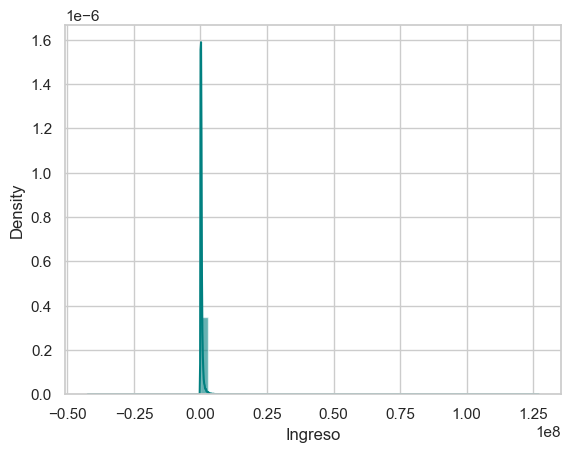

In [6]:
ax = casen2017["ytot"].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.6)
casen2017["ytot"].plot(kind='density', color='teal')
ax.set(xlabel='Ingreso')

plt.show()

Se evidencia la presencia de outliers en ingreso.
Se decide por el momento no trabajar estos, pero sí llenar los nulos con 0

In [7]:
casen2017['ytot'].fillna(0, inplace=True)

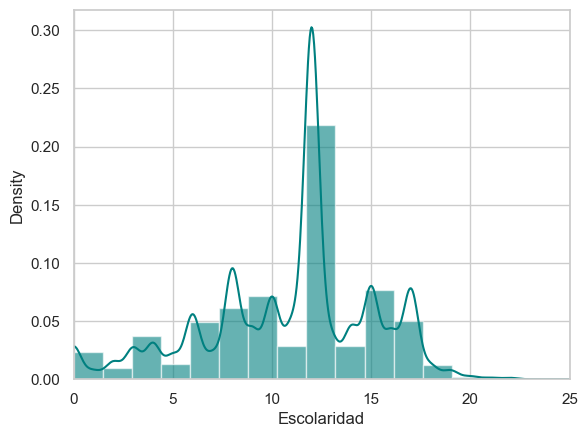

In [8]:
# Solo se imputan los valores para la columna de escolaridad,
# siendo los otros variables categóricas no imputables

ax = casen2017["esc"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
casen2017["esc"].plot(kind='density', color='teal')
ax.set(xlabel='Escolaridad')

plt.xlim(0,25)

plt.show()

In [9]:
casen2017["esc"].mean(skipna=True)

10.825770720104792

In [10]:
casen2017["esc"].median(skipna=True)

12.0

Se identifica que tendería más hacia la media que la mediana ("cola hacia la izquierda"), por lo que se ocupa ese valor para imputar

In [11]:
casen2017_pre = casen2017.copy()

casen2017['esc'].fillna(casen2017['esc'].mean(skipna=True), inplace=True)

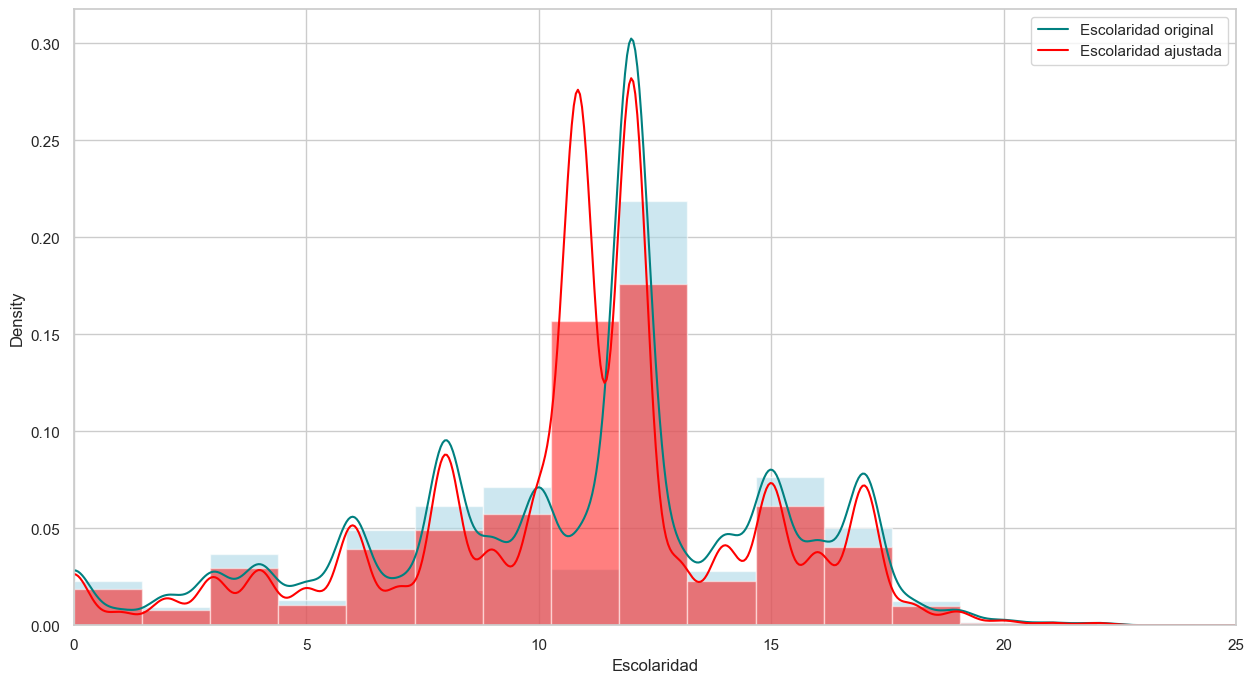

In [12]:
plt.figure(figsize=(15,8))

ax = casen2017_pre["esc"].hist(bins=15, density=True, stacked=True, color='lightblue', alpha=0.6)
casen2017_pre["esc"].plot(kind='density', color='teal')

ax = casen2017["esc"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.5)

casen2017["esc"].plot(kind='density', color='red')

ax.legend(['Escolaridad original', 'Escolaridad ajustada'])
ax.set(xlabel='Escolaridad')

plt.xlim(0,25)

plt.show()

In [13]:
casen2017.isnull().sum()

folio                0
sexo                 0
edad                 0
ecivil               0
o1               41363
oficio1         124022
o16             147809
s12                  0
ytot                 0
pobreza            208
esc                  0
educ                 0
depen           158317
activ            41363
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64

In [14]:
casen2017.isnull().sum()

folio                0
sexo                 0
edad                 0
ecivil               0
o1               41363
oficio1         124022
o16             147809
s12                  0
ytot                 0
pobreza            208
esc                  0
educ                 0
depen           158317
activ            41363
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64

In [15]:
# Se eliminan las filas de valores categóricos, no habiendo una estrategia para su imputación en esta instancia

casen2017 = casen2017.dropna(subset=['pobreza'])
casen2017 = casen2017.dropna(subset=['depen'])
casen2017 = casen2017.dropna(subset=['activ'])


# Para el caso de oficio1 (ocupación u oficio) se llenan los nulos, correspondiente a personas inactivas o desocupadas
casen2017['oficio1'].fillna('No aplica', inplace=True)


casen2017 = casen2017.dropna(subset=['o1'])

# Para el caso de o16 (tipo de contrato) se llenan los vacíos, correspondiente a personas inactivas o desocupadas
casen2017['o16'].fillna('No aplica', inplace=True)


# Se elimina el folio, el que no presenta utilidad
casen2017 = casen2017.drop('folio', axis=1)


In [16]:
casen2017.isnull().sum()

sexo            0
edad            0
ecivil          0
o1              0
oficio1         0
o16             0
s12             0
ytot            0
pobreza         0
esc             0
educ            0
depen           0
activ           0
indmat          0
indsan          0
calglobviv      0
hacinamiento    0
dtype: int64

In [17]:
# Se genera una lista que recupera los valores de pobreza


tipo_pobreza = list(casen2017['pobreza'].unique())
tipo_pobreza

['No pobres', 'Pobres no extremos', 'Pobres extremos']

In [18]:
tipo_pobreza[0]

'No pobres'

In [19]:
# Se cambia categoría de pobreza hacia 0 y 1

# Se define función para cambiar valores
def sep_pobreza(x):
    if x == tipo_pobreza[0]:
        return 0
    else:
        return 1

In [20]:
casen2017['pobreza'] = casen2017['pobreza'].apply(lambda x: sep_pobreza(x))

In [21]:
# Se convierte escolaridad en variable discreta


casen2017['esc'] = casen2017['esc'].astype(int)

In [22]:
casen2017.head()

,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
23,Mujer,16,Soltero(a),No,No aplica,No aplica,FF.AA. y de Orden,0.0,0,11,M. Hum. Incompleta,Particular Subvencionado,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
28,Hombre,22,Soltero(a),No,No aplica,No aplica,Sistema Público FONASA Grupo B,0.0,0,16,Profesional Incompleto,Universidad del Cruch,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
42,Mujer,15,Soltero(a),No,No aplica,No aplica,Ninguno (Particular),0.0,0,9,M. Hum. Incompleta,Particular Subvencionado,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Hacinamiento medio bajo (2,5 a 3,49)"
46,Mujer,17,Soltero(a),No,No aplica,No aplica,Sistema Público FONASA Grupo A,0.0,0,11,M. Téc. Prof. Incompleta,Municipal,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Hacinamiento medio alto (3,5 a 4,9)"
47,Mujer,15,Soltero(a),No,No aplica,No aplica,Sistema Público FONASA Grupo A,0.0,0,9,M. Téc. Prof. Incompleta,Municipal,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Hacinamiento medio alto (3,5 a 4,9)"


In [23]:
casen2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24366 entries, 23 to 216438
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sexo          24366 non-null  object 
 1   edad          24366 non-null  int64  
 2   ecivil        24366 non-null  object 
 3   o1            24366 non-null  object 
 4   oficio1       24366 non-null  object 
 5   o16           24366 non-null  object 
 6   s12           24366 non-null  object 
 7   ytot          24366 non-null  float64
 8   pobreza       24366 non-null  int64  
 9   esc           24366 non-null  int32  
 10  educ          24366 non-null  object 
 11  depen         24366 non-null  object 
 12  activ         24366 non-null  object 
 13  indmat        24366 non-null  object 
 14  indsan        24366 non-null  object 
 15  calglobviv    24366 non-null  object 
 16  hacinamiento  24366 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(13)
memory usage: 3.3+ MB

# 4.- Exploración de datos

Quedan asi 15 variables.

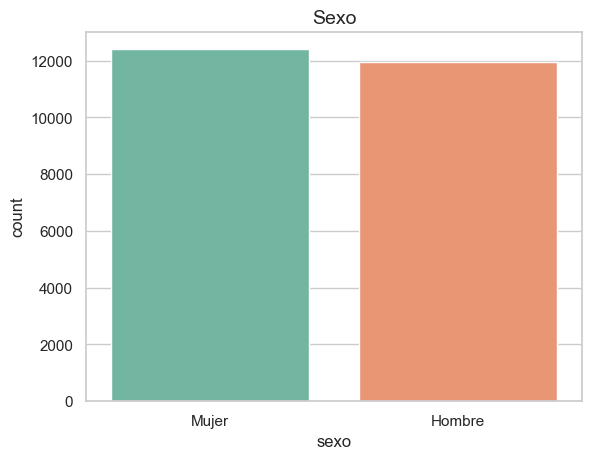

In [24]:
sns.countplot(x='sexo', data=casen2017, palette='Set2')

plt.title('Sexo', fontsize = 14)

plt.show()

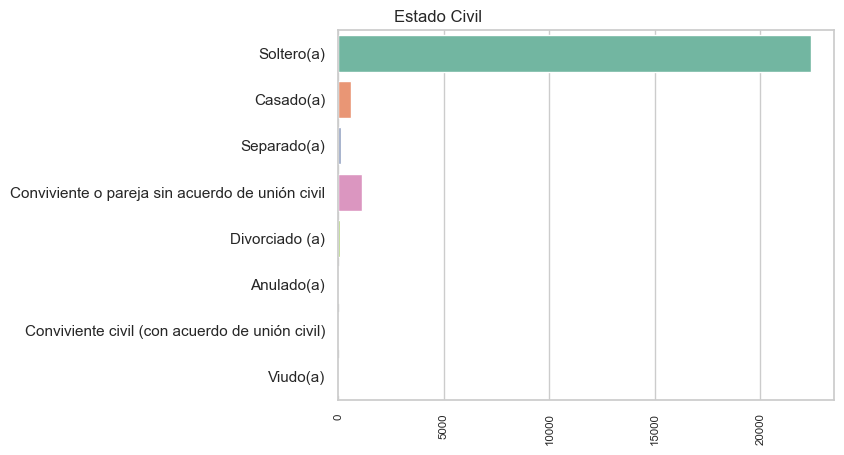

In [25]:
sns.countplot(y='ecivil', data=casen2017, palette='Set2')

plt.xticks(rotation=90,
           fontsize='x-small')

plt.xlabel('')
plt.ylabel('')

plt.title('Estado Civil', x=0.2, fontsize = 12)
plt.show()

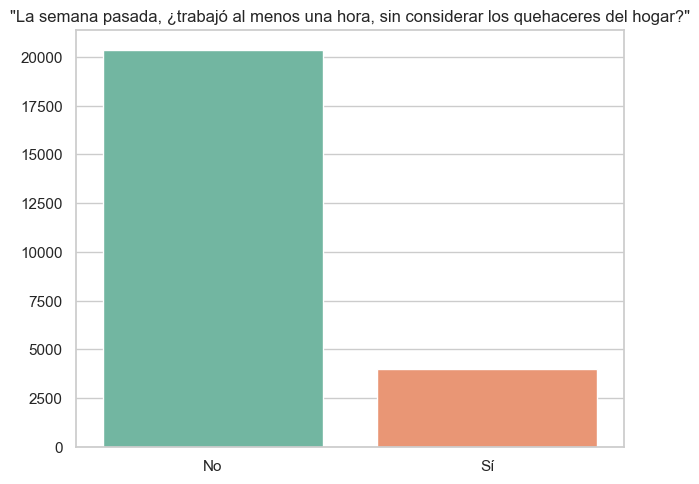

In [26]:
sns.countplot(x='o1', data=casen2017, palette='Set2')


plt.xlabel('')
plt.ylabel('')

plt.tight_layout()

plt.title('"La semana pasada, ¿trabajó al menos una hora, sin considerar los quehaceres del hogar?"', x=0.5, fontsize = 12)

plt.show()

In [27]:
casen2017.oficio1

23                                                No aplica
28                                                No aplica
42                                                No aplica
46                                                No aplica
47                                                No aplica
                                ...                        
216283                                            No aplica
216310                                            No aplica
216328                                            No aplica
216413                                            No aplica
216438    Agricultores y trabajadores calificados agrope...
Name: oficio1, Length: 24366, dtype: object

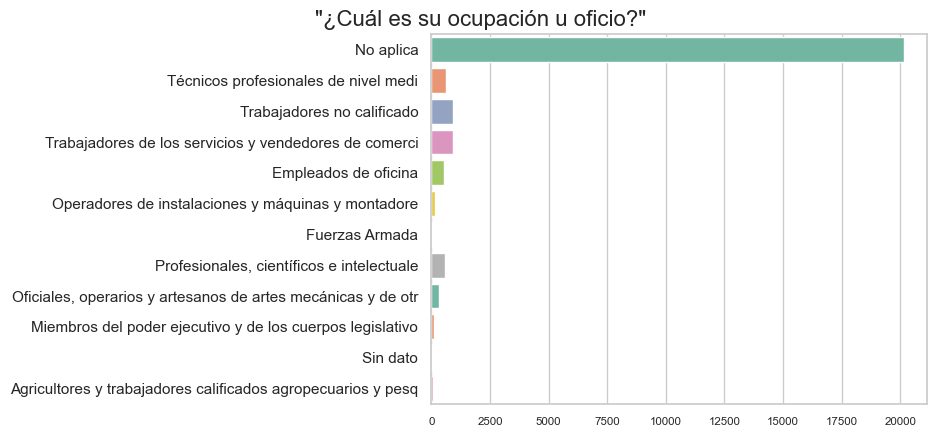

In [28]:
sns.countplot(y='oficio1', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('"¿Cuál es su ocupación u oficio?"', x=0.1, fontsize = 16)
plt.show()

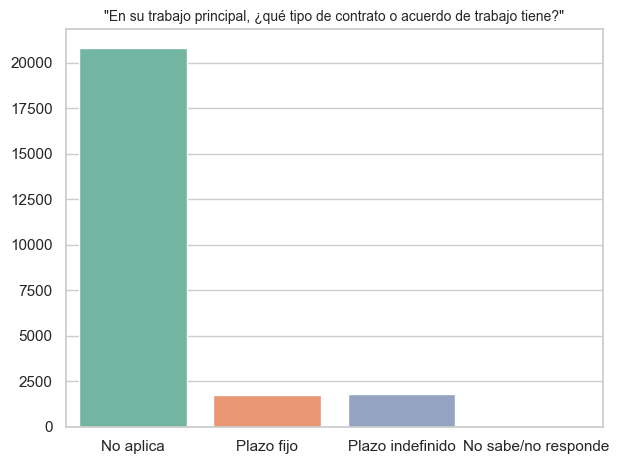

In [29]:
sns.countplot(x='o16', data=casen2017, palette='Set2')


plt.xlabel('')
plt.ylabel('')


plt.title('"En su trabajo principal, ¿qué tipo de contrato o acuerdo de trabajo tiene?"', x=0.5, fontsize = 10)

plt.tight_layout()

plt.show()

In [30]:
# Se determina que la opción de No sabe/no responde no ofrece valor analítico, por lo que se elimina

casen2017 = casen2017[casen2017.o16 != 'No sabe/no responde']

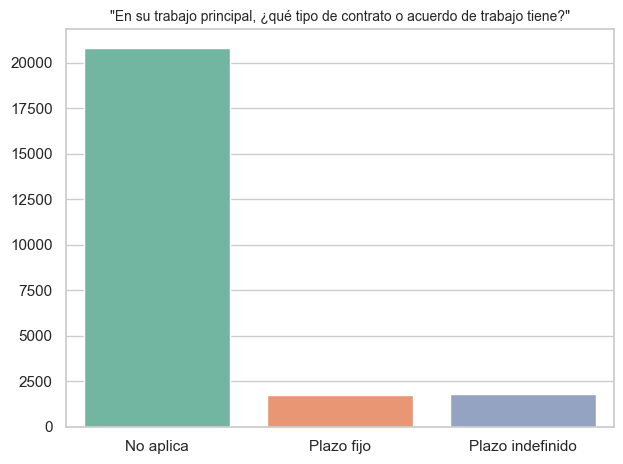

In [31]:
sns.countplot(x='o16', data=casen2017, palette='Set2')


plt.xlabel('')
plt.ylabel('')


plt.title('"En su trabajo principal, ¿qué tipo de contrato o acuerdo de trabajo tiene?"', x=0.5, fontsize = 10)

plt.tight_layout()

plt.show()

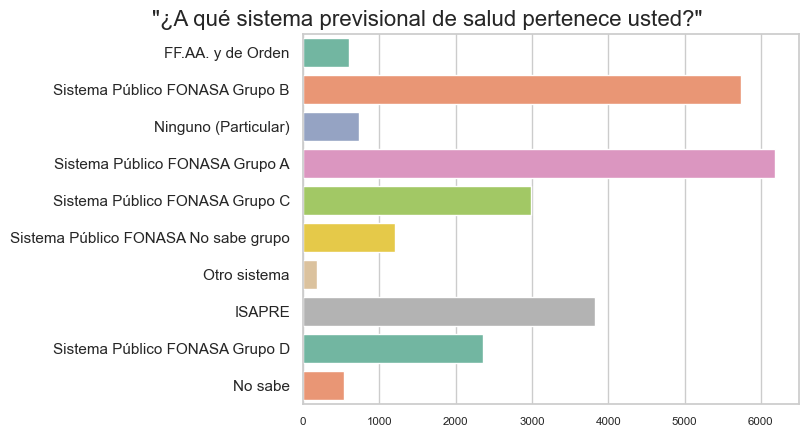

In [32]:
sns.countplot(y='s12', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('"¿A qué sistema previsional de salud pertenece usted?"', x=0.25, fontsize = 16)
plt.show()

In [33]:
# Se considera que quienes no sepan su grupo FONASA no ofrecern valor analítico, por lo que se eliminan

casen2017 = casen2017[casen2017.s12 != 'Sistema Público FONASA No sabe grupo']

# Lo mismo con quienes no saben su sistema previsional o señalan uno no identificable

casen2017 = casen2017[casen2017.s12 != 'No sabe']
casen2017 = casen2017[casen2017.s12 != 'Otro sistema']

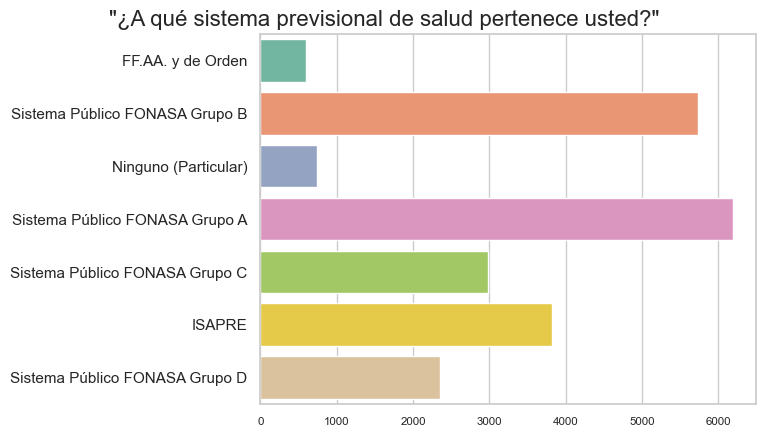

In [34]:
sns.countplot(y='s12', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('"¿A qué sistema previsional de salud pertenece usted?"', x=0.25, fontsize = 16)
plt.show()

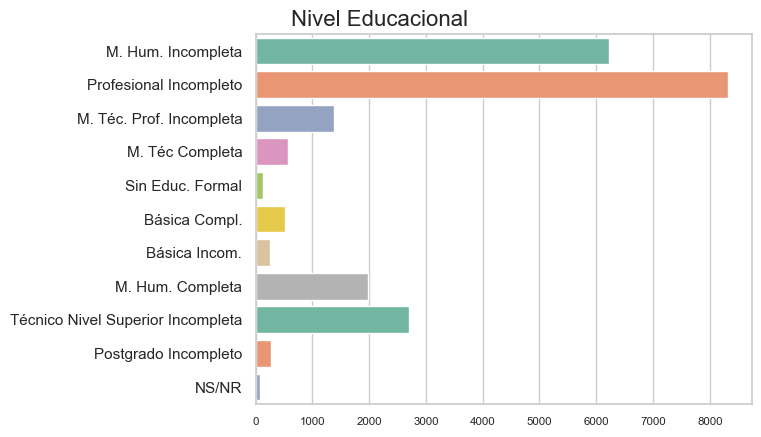

In [35]:
sns.countplot(y='educ', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Nivel Educacional', x=0.25, fontsize = 16)
plt.show()

In [36]:
# Se eliminan quienes no saben o no responden

casen2017 = casen2017[casen2017.educ != 'NS/NR']

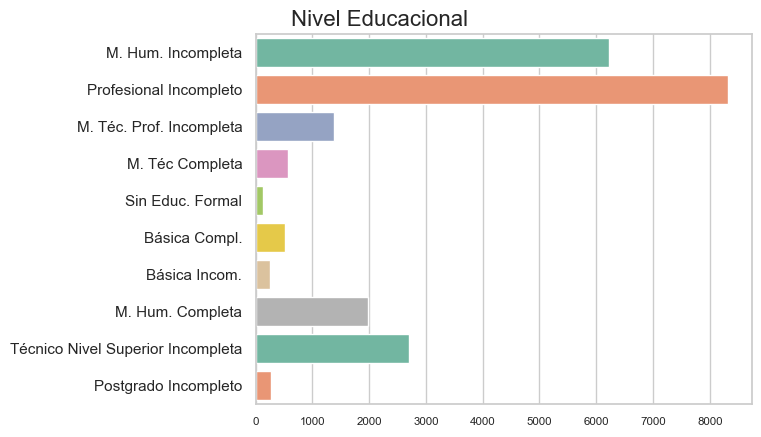

In [37]:
sns.countplot(y='educ', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Nivel Educacional', x=0.25, fontsize = 16)
plt.show()

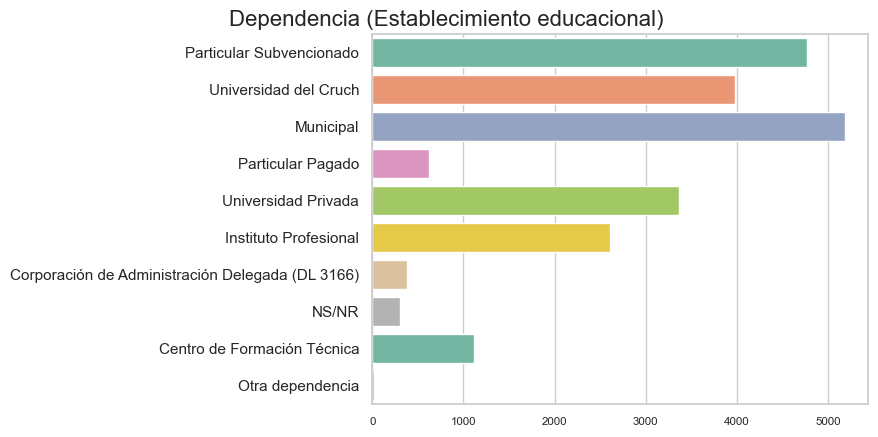

In [38]:
sns.countplot(y='depen', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Dependencia (Establecimiento educacional)', x=0.15, fontsize = 16)
plt.show()

In [39]:
# Se eliminan quienes no saben o no responden o corresponden a sistemas no identificables

casen2017 = casen2017[casen2017.depen != 'NS/NR']
casen2017 = casen2017[casen2017.depen != 'Otra dependencia']


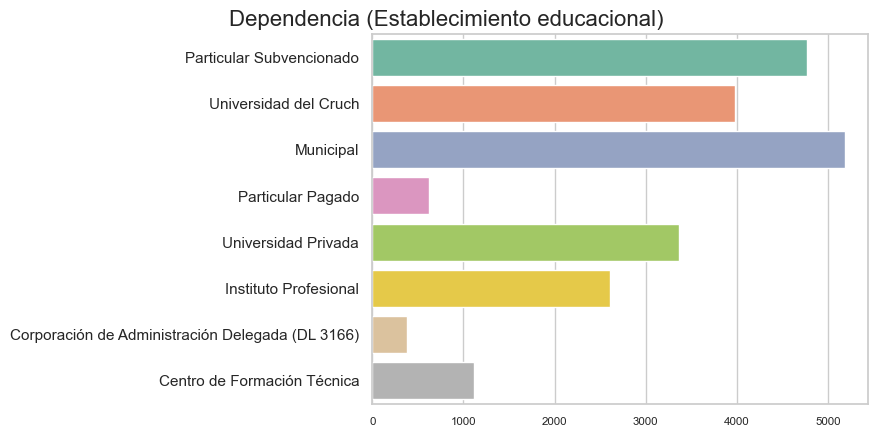

In [40]:
sns.countplot(y='depen', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Dependencia (Establecimiento educacional)', x=0.15, fontsize = 16)
plt.show()

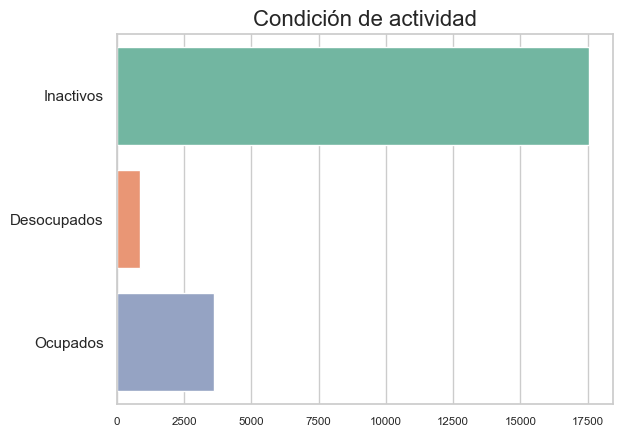

In [41]:
sns.countplot(y='activ', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Condición de actividad', fontsize = 16)
plt.show()

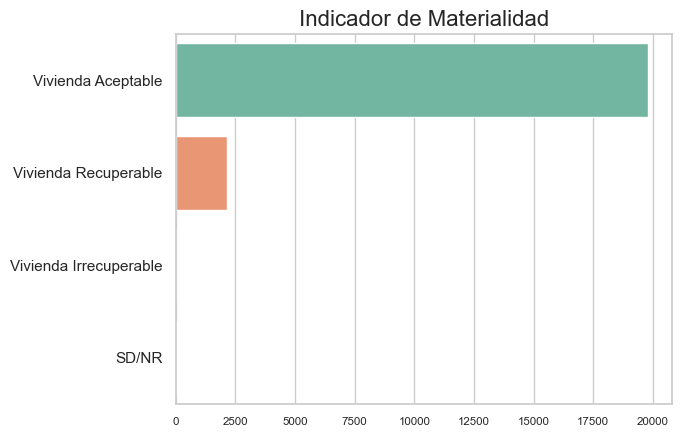

In [42]:
sns.countplot(y='indmat', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Indicador de Materialidad', fontsize = 16)
plt.show()

In [43]:
# Se elimina el valor de no responde

casen2017 = casen2017[casen2017.indmat != 'SD/NR']

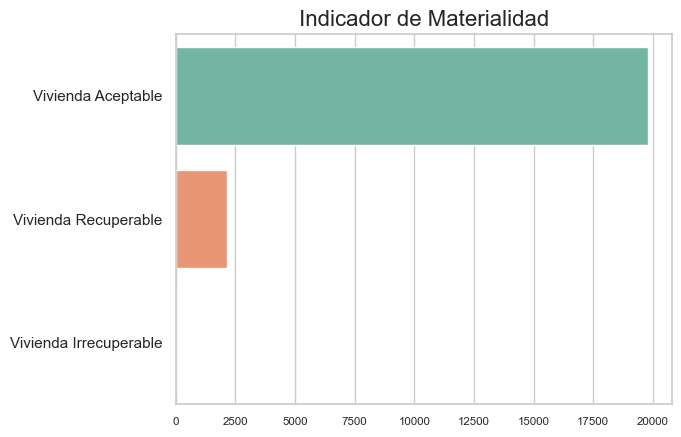

In [44]:
sns.countplot(y='indmat', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Indicador de Materialidad', fontsize = 16)
plt.show()

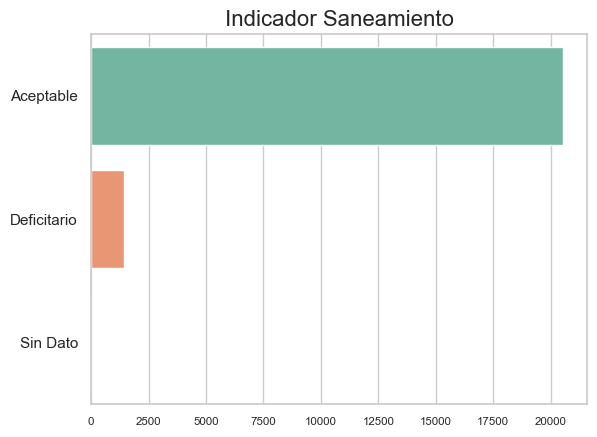

In [45]:
sns.countplot(y='indsan', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Indicador Saneamiento', fontsize = 16)
plt.show()

In [46]:
# Se eliminan los "Sin Dato"

casen2017 = casen2017[casen2017.indsan != 'Sin Dato']

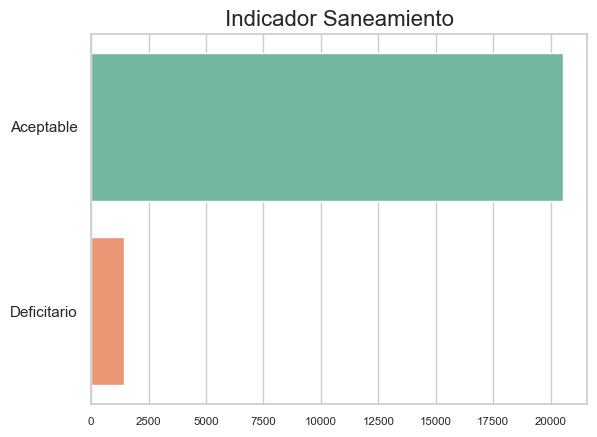

In [47]:
sns.countplot(y='indsan', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Indicador Saneamiento', fontsize = 16)
plt.show()

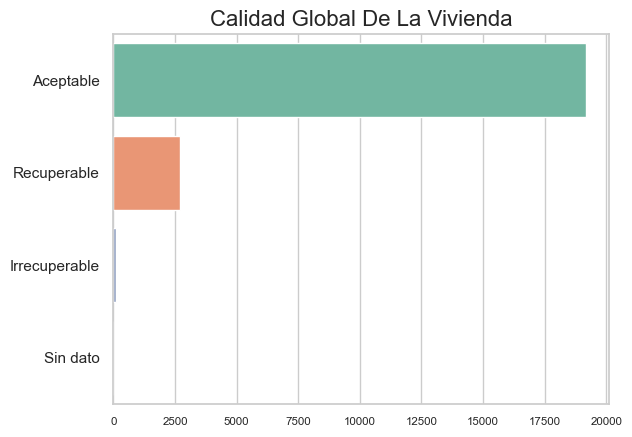

In [48]:
sns.countplot(y='calglobviv', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Calidad Global De La Vivienda', fontsize = 16)
plt.show()

In [49]:
# Se eliminan los "Sin Dato"

casen2017 = casen2017[casen2017.calglobviv != 'Sin dato']

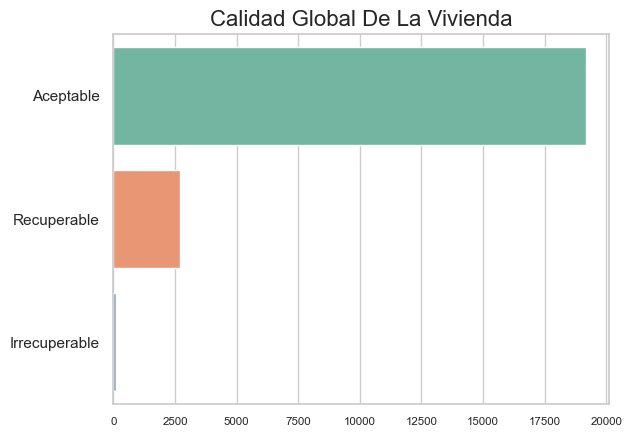

In [50]:
sns.countplot(y='calglobviv', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Calidad Global De La Vivienda', fontsize = 16)
plt.show()

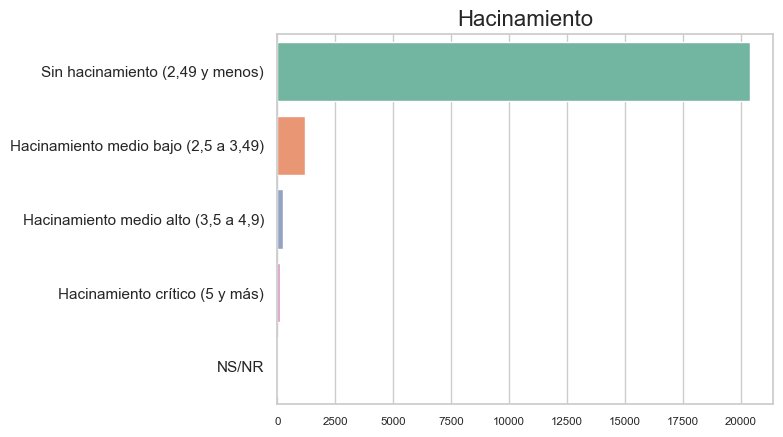

In [51]:
sns.countplot(y='hacinamiento', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Hacinamiento', fontsize = 16)
plt.show()

In [52]:
# Se eliminan los "Sin Dato"

casen2017 = casen2017[casen2017.hacinamiento != 'NS/NR']

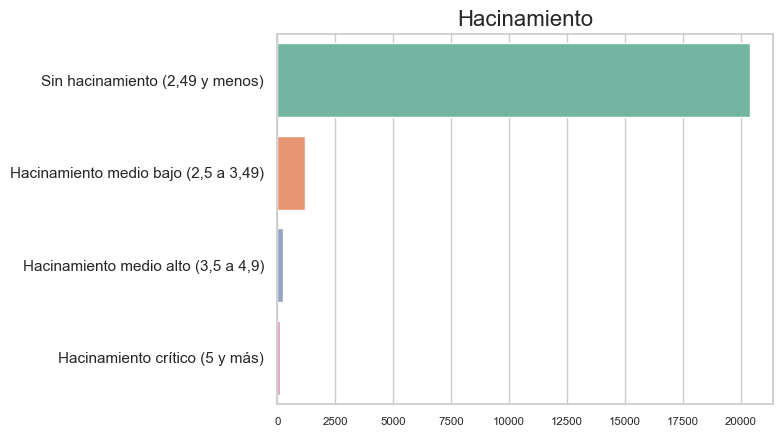

In [53]:
sns.countplot(y='hacinamiento', data=casen2017, palette='Set2')

plt.xticks(rotation=0,
           fontsize='x-small'
           )

plt.xlabel('')
plt.ylabel('')

plt.title('Hacinamiento', fontsize = 16)
plt.show()

In [54]:
casen2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21947 entries, 23 to 216413
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sexo          21947 non-null  object 
 1   edad          21947 non-null  int64  
 2   ecivil        21947 non-null  object 
 3   o1            21947 non-null  object 
 4   oficio1       21947 non-null  object 
 5   o16           21947 non-null  object 
 6   s12           21947 non-null  object 
 7   ytot          21947 non-null  float64
 8   pobreza       21947 non-null  int64  
 9   esc           21947 non-null  int32  
 10  educ          21947 non-null  object 
 11  depen         21947 non-null  object 
 12  activ         21947 non-null  object 
 13  indmat        21947 non-null  object 
 14  indsan        21947 non-null  object 
 15  calglobviv    21947 non-null  object 
 16  hacinamiento  21947 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(13)
memory usage: 2.9+ MB

In [55]:
casen2017.isnull().sum()

sexo            0
edad            0
ecivil          0
o1              0
oficio1         0
o16             0
s12             0
ytot            0
pobreza         0
esc             0
educ            0
depen           0
activ           0
indmat          0
indsan          0
calglobviv      0
hacinamiento    0
dtype: int64

# 5.- Selección de variables

Se decide trabajar con cuatro dimensiones:

Género, Sistema de Salud, Educación y Condición de vivienda.

In [56]:
df = casen2017[['sexo', 's12', 'educ', 'indmat', 'pobreza']].copy()

In [57]:
df.head()

,sexo,s12,educ,indmat,pobreza
23,Mujer,FF.AA. y de Orden,M. Hum. Incompleta,Vivienda Aceptable,0
28,Hombre,Sistema Público FONASA Grupo B,Profesional Incompleto,Vivienda Aceptable,0
42,Mujer,Ninguno (Particular),M. Hum. Incompleta,Vivienda Aceptable,0
46,Mujer,Sistema Público FONASA Grupo A,M. Téc. Prof. Incompleta,Vivienda Aceptable,0
47,Mujer,Sistema Público FONASA Grupo A,M. Téc. Prof. Incompleta,Vivienda Aceptable,0


# 6.- Regresión Logística

In [58]:
# Se divide la base de datos dejando 20% en test y 80% en train

X_train, X_test = train_test_split(df, test_size=0.2, random_state=6) 

In [59]:
# y_train = X_train['pobreza']
# y_test = X_test['pobreza']

# X_train.drop(['pobreza'], axis=1)
# X_test.drop(['pobreza'], axis=1)

In [60]:
training = pd.get_dummies(X_train, columns=['sexo', 's12', 'educ', 'indmat'])
training.drop('sexo_Mujer', axis=1, inplace=True)

training.head()

,pobreza,sexo_Hombre,s12_FF.AA. y de Orden,s12_ISAPRE,s12_Ninguno (Particular),s12_Sistema Público FONASA Grupo A,s12_Sistema Público FONASA Grupo B,s12_Sistema Público FONASA Grupo C,s12_Sistema Público FONASA Grupo D,educ_Básica Compl.,...,educ_M. Hum. Incompleta,educ_M. Téc Completa,educ_M. Téc. Prof. Incompleta,educ_Postgrado Incompleto,educ_Profesional Incompleto,educ_Sin Educ. Formal,educ_Técnico Nivel Superior Incompleta,indmat_Vivienda Aceptable,indmat_Vivienda Irrecuperable,indmat_Vivienda Recuperable
108346,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
144519,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
138286,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142854,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
85602,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [61]:
testing = pd.get_dummies(X_test, columns=['sexo', 's12', 'educ', 'indmat'])

testing.drop('sexo_Mujer', axis=1, inplace=True)

testing.drop('pobreza', axis=1, inplace=True)

testing.head()

,sexo_Hombre,s12_FF.AA. y de Orden,s12_ISAPRE,s12_Ninguno (Particular),s12_Sistema Público FONASA Grupo A,s12_Sistema Público FONASA Grupo B,s12_Sistema Público FONASA Grupo C,s12_Sistema Público FONASA Grupo D,educ_Básica Compl.,educ_Básica Incom.,...,educ_M. Hum. Incompleta,educ_M. Téc Completa,educ_M. Téc. Prof. Incompleta,educ_Postgrado Incompleto,educ_Profesional Incompleto,educ_Sin Educ. Formal,educ_Técnico Nivel Superior Incompleta,indmat_Vivienda Aceptable,indmat_Vivienda Irrecuperable,indmat_Vivienda Recuperable
112086,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20784,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
201782,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
71801,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
108170,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<AxesSubplot:title={'center':'Correlación de Pearson para las Features'}>

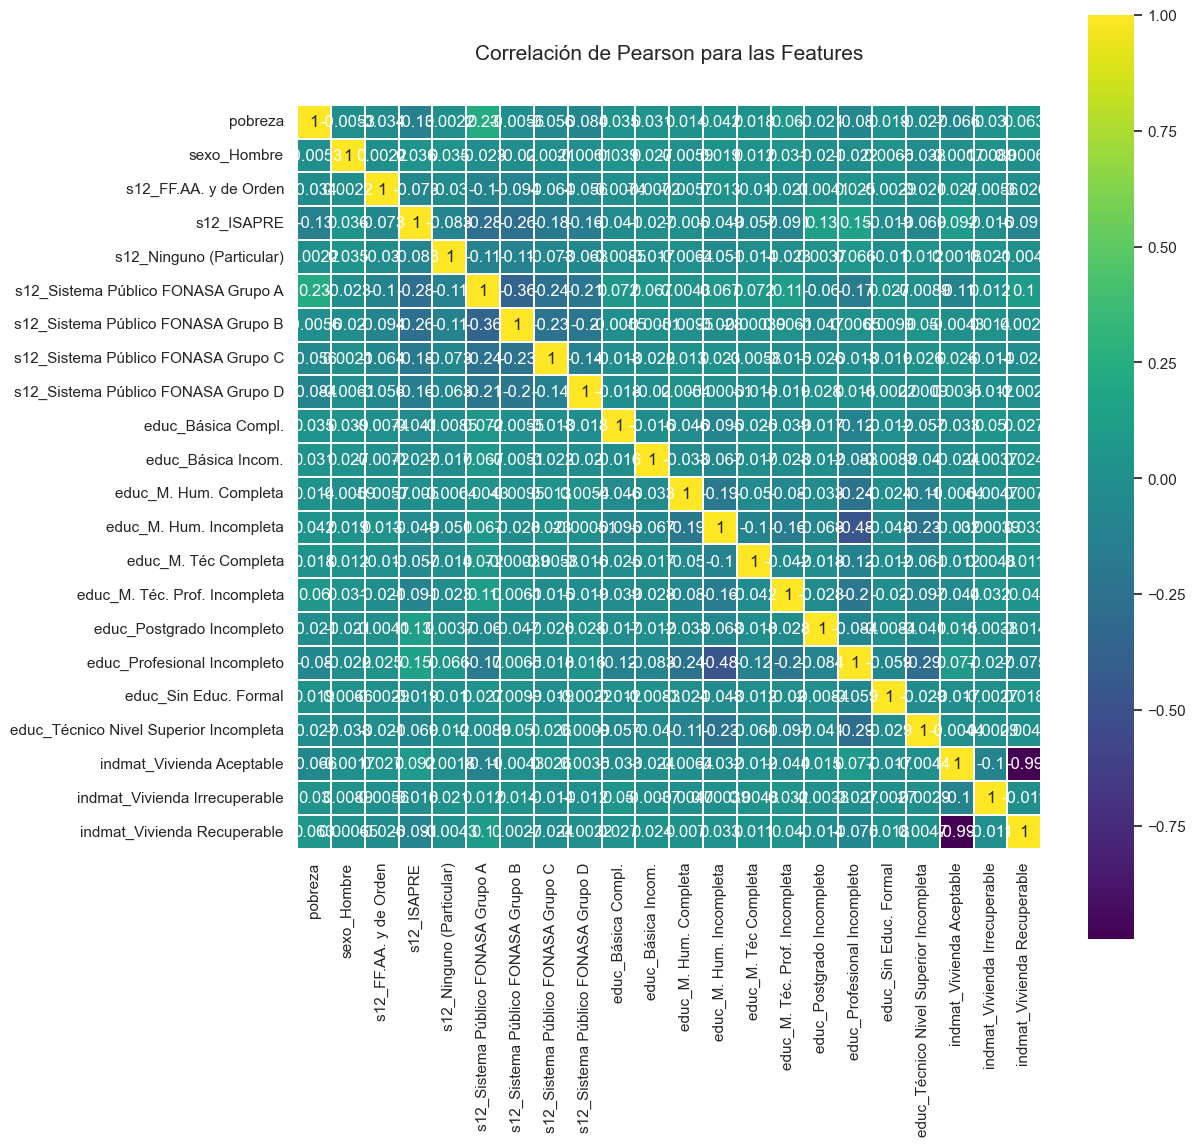

In [62]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación de Pearson para las Features', y=1.05, size=15)
sns.heatmap(training.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Desde lo anterior se observaría como problemática la categoría de vivienda, la que se identifica estaría demasiado estrechamente ligada con la pobreza.

In [63]:
# training.drop('pobreza', axis=1, inplace=True)
# testing.drop('pobreza', axis=1, inplace=True)

In [64]:
testing.head()


,sexo_Hombre,s12_FF.AA. y de Orden,s12_ISAPRE,s12_Ninguno (Particular),s12_Sistema Público FONASA Grupo A,s12_Sistema Público FONASA Grupo B,s12_Sistema Público FONASA Grupo C,s12_Sistema Público FONASA Grupo D,educ_Básica Compl.,educ_Básica Incom.,...,educ_M. Hum. Incompleta,educ_M. Téc Completa,educ_M. Téc. Prof. Incompleta,educ_Postgrado Incompleto,educ_Profesional Incompleto,educ_Sin Educ. Formal,educ_Técnico Nivel Superior Incompleta,indmat_Vivienda Aceptable,indmat_Vivienda Irrecuperable,indmat_Vivienda Recuperable
112086,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20784,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
201782,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
71801,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
108170,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [65]:
training.head()

,pobreza,sexo_Hombre,s12_FF.AA. y de Orden,s12_ISAPRE,s12_Ninguno (Particular),s12_Sistema Público FONASA Grupo A,s12_Sistema Público FONASA Grupo B,s12_Sistema Público FONASA Grupo C,s12_Sistema Público FONASA Grupo D,educ_Básica Compl.,...,educ_M. Hum. Incompleta,educ_M. Téc Completa,educ_M. Téc. Prof. Incompleta,educ_Postgrado Incompleto,educ_Profesional Incompleto,educ_Sin Educ. Formal,educ_Técnico Nivel Superior Incompleta,indmat_Vivienda Aceptable,indmat_Vivienda Irrecuperable,indmat_Vivienda Recuperable
108346,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
144519,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
138286,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142854,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
85602,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
# Para cada variable se elima una de las opciones

cols = ['sexo_Hombre',
        's12_FF.AA. y de Orden',
        # 's12_ISAPRE',
        's12_Sistema Público FONASA Grupo A',
        's12_Sistema Público FONASA Grupo B',
        's12_Sistema Público FONASA Grupo C',
        's12_Sistema Público FONASA Grupo D',
        'educ_Básica Compl.',
        # 'educ_Básica Incom.',
        'educ_M. Hum. Completa',
        'educ_M. Hum. Incompleta',
        'educ_M. Téc Completa',
        'educ_M. Téc. Prof. Incompleta',
        'educ_Postgrado Incompleto',
        'educ_Profesional Incompleto',
        'educ_Técnico Nivel Superior Incompleta',
        # 'indmat_Vivienda Aceptable',
        'indmat_Vivienda Irrecuperable'
        ]

X = training[cols]

y = training['pobreza']

model1= LogisticRegression().fit(X, y)
model1.intercept_

array([-2.94602535])

In [67]:
y.head()

108346    0
144519    0
138286    0
142854    0
85602     0
Name: pobreza, dtype: int64

In [68]:
model1.coef_

array([[-0.01592734,  0.14706639,  1.95124606,  1.13082215,  0.58540016,
        -0.11460101, -0.02283814, -0.14320796, -0.15075977, -0.28018557,
         0.00257151, -0.25739857, -0.49040829, -0.57960158,  0.98555838]])

In [69]:
model1.predict_proba(X)

array([[0.87717683, 0.12282317],
       [0.94989197, 0.05010803],
       [0.8763609 , 0.1236391 ],
       ...,
       [0.78159147, 0.21840853],
       [0.95644644, 0.04355356],
       [0.94537208, 0.05462792]])

In [70]:
model1.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
model1.score(X, y)

0.8908697385658142

In [72]:
confusion_matrix(y, model1.predict(X))

array([[15641,     0],
       [ 1916,     0]], dtype=int64)

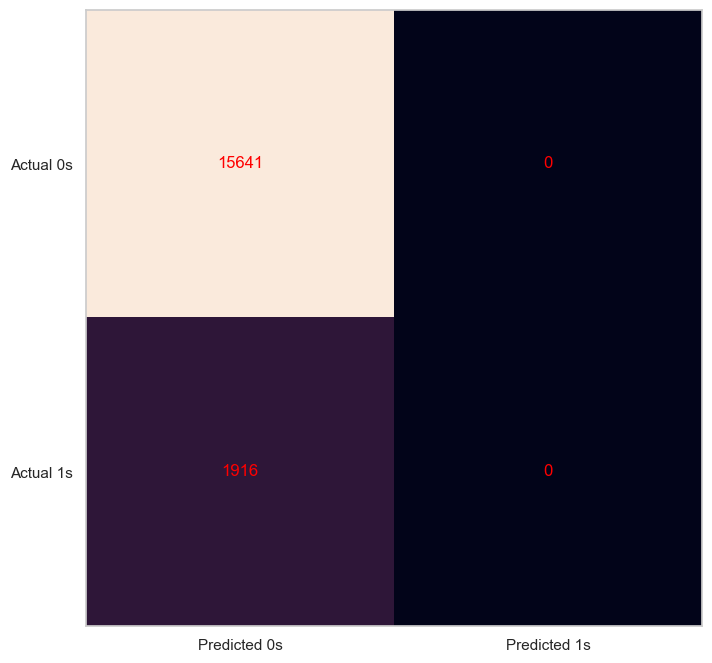

In [73]:
cm = confusion_matrix(y, model1.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Se identifica la existencia de un error en el procesamiento de los datos a partir de evidenciar que no habrín ni Falsos Positivos ni Verdaderos Negativos. No es posible identificar la causa.

In [74]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15641
           1       0.00      0.00      0.00      1916

    accuracy                           0.89     17557
   macro avg       0.45      0.50      0.47     17557
weighted avg       0.79      0.89      0.84     17557



C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

Habría un 100% de sensibilidad, lo que estaría indicando que se está identificando el 100% de los casos de pobreza, lo cual indica un error.

In [75]:
# Construcción del modelo y estimación. 
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.323325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                pobreza   No. Observations:                17557
Model:                          Logit   Df Residuals:                    17542
Method:                           MLE   Df Model:                           14
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                 0.06199
Time:                        17:15:22   Log-Likelihood:                -5676.6
converged:                       True   LL-Null:                       -6051.8
Covariance Type:            nonrobust   LLR p-value:                4.667e-151
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
sexo_Hombre                               -0.2221   

In [76]:
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                                              OR  Lower CI  Upper CI
sexo_Hombre                             0.800818  0.728036  0.880876
s12_FF.AA. y de Orden                   0.537743  0.333449  0.867201
s12_Sistema Público FONASA Grupo A      3.091252  2.695665  3.544891
s12_Sistema Público FONASA Grupo B      1.396305  1.201490  1.622708
s12_Sistema Público FONASA Grupo C      0.844082  0.689318  1.033593
s12_Sistema Público FONASA Grupo D      0.406097  0.306684  0.537737
educ_Básica Compl.                      0.125622  0.093594  0.168609
educ_M. Hum. Completa                   0.102322  0.084287  0.124216
educ_M. Hum. Incompleta                 0.104254  0.090130  0.120592
educ_M. Téc Completa                    0.096729  0.071802  0.130309
educ_M. Téc. Prof. Incompleta           0.129118  0.105343  0.158259
educ_Postgrado Incompleto               0.058168  0.030643  0.110416
educ_Profesional Incompleto             0.068166  0.059330  0.078318
educ_Técnico Nivel Superior Incomp

Salud.

Se estaría identificando como primer y principal variable asociada a la pobreza el pertenecer a FONASA Grupo A, correspondiendo a un 3.09 más de posibilidades de asociarse a la pobreza que ser de ISAPRE (variable eliminada), situación similar pero en menor medida con ser del Grupo B (1.39 más veces de estar en la pobreza).

Género

Según el resultado, ser Hombre indicaria que se tiene 0.80 veces menos de posibilidad de ser pobre.

Vivienda

Vivir en un avivienda en condición irrecuperable indicaría un 3.3 veces más de riesgo de estar en la pobreza que si se vivie en una vivienda en condición aceptable.

Educación

Habiéndose tomado como referencia el no haber completado la educación básica, todas las cateogrías ofrecerían una diferencia de importante significancia en torno a no estar en la pobreza, las que evidencian una correlacionidad respecto a la cantidad de años de escolaridad que requieren.

In [77]:
# Selección de 5 features

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe = rfe.fit(X, y)

# Muestra los atributos seleccionados
print('Features seleccionadas: %s' % list(X.columns[rfe.support_]))

Features seleccionadas: ['s12_Sistema Público FONASA Grupo A', 's12_Sistema Público FONASA Grupo B', 's12_Sistema Público FONASA Grupo C', 'educ_Técnico Nivel Superior Incompleta', 'indmat_Vivienda Irrecuperable']


Las variables detectadas manualmente se corresponden con las indicadas por el modelo.

Número óptimo de features: 1
Features seleccionados: ['s12_Sistema Público FONASA Grupo A']


C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


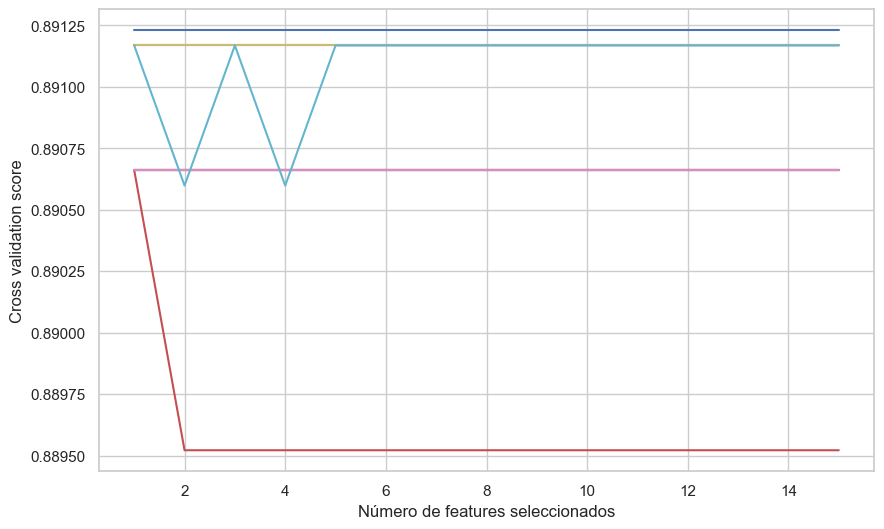

In [78]:
# Creación de objeto RFE y cross Validation

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Número óptimo de features: %d" % rfecv.n_features_)
print('Features seleccionados: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Número de features seleccionados")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Se estaría observando que el número óptimo de features sería 1, en relación a la importancia estadística de FONASA Grupo A.

Se estima así que el criterio de selección merecería un replantamiento.

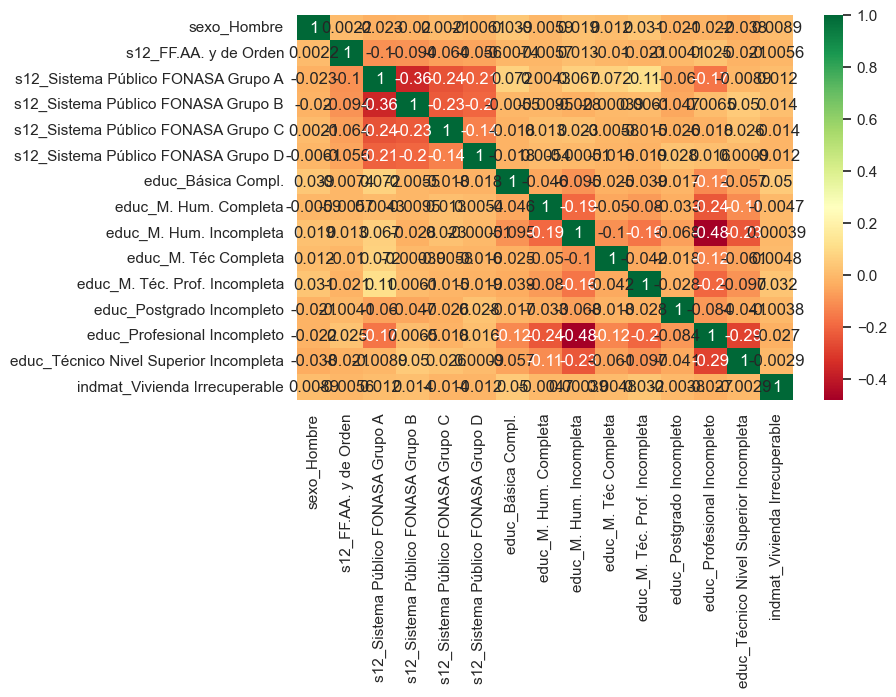

In [79]:
Selected_features = cols
X = training[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [80]:
# Construcción de modelo

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.323325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                pobreza   No. Observations:                17557
Model:                          Logit   Df Residuals:                    17542
Method:                           MLE   Df Model:                           14
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                 0.06199
Time:                        17:15:28   Log-Likelihood:                -5676.6
converged:                       True   LL-Null:                       -6051.8
Covariance Type:            nonrobust   LLR p-value:                4.667e-151
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
sexo_Hombre                               -0.2221   

In [81]:
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                                              OR  Lower CI  Upper CI
sexo_Hombre                             0.800818  0.728036  0.880876
s12_FF.AA. y de Orden                   0.537743  0.333449  0.867201
s12_Sistema Público FONASA Grupo A      3.091252  2.695665  3.544891
s12_Sistema Público FONASA Grupo B      1.396305  1.201490  1.622708
s12_Sistema Público FONASA Grupo C      0.844082  0.689318  1.033593
s12_Sistema Público FONASA Grupo D      0.406097  0.306684  0.537737
educ_Básica Compl.                      0.125622  0.093594  0.168609
educ_M. Hum. Completa                   0.102322  0.084287  0.124216
educ_M. Hum. Incompleta                 0.104254  0.090130  0.120592
educ_M. Téc Completa                    0.096729  0.071802  0.130309
educ_M. Téc. Prof. Incompleta           0.129118  0.105343  0.158259
educ_Postgrado Incompleto               0.058168  0.030643  0.110416
educ_Profesional Incompleto             0.068166  0.059330  0.078318
educ_Técnico Nivel Superior Incomp

Resultados  de Train/Test :
LogisticRegression accuracy is 0.889
LogisticRegression log_loss is 0.317
LogisticRegression auc is 0.722


C:\Users\Martín\AppData\Local\Temp\ipykernel_5432\1997839985.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
C:\Users\Martín\AppData\Local\Temp\ipykernel_5432\1997839985.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


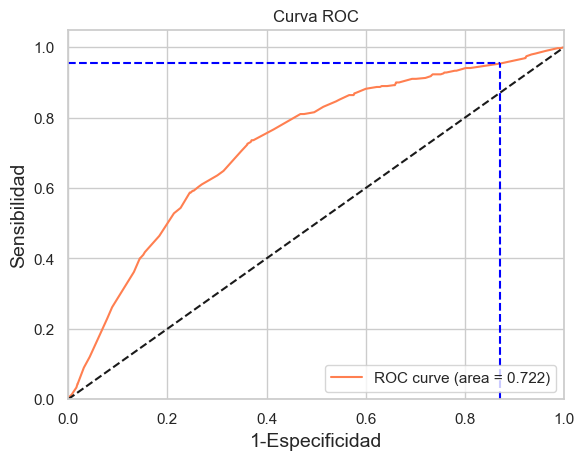

Using a threshold of 0.031 guarantees a sensitivity of 0.954 and a specificity of 0.128, i.e. a false positive rate of 87.16%.


In [82]:
# Creación de  X (features) e y (response)
X = training[Selected_features]
y = training['pobreza']


#split de los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Revision de clasificación de la regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Resultados  de Train/Test :')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # Indice para el primer limite para una sensibilidad mayor a 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Especificidad', fontsize=14)
plt.ylabel('Sensibilidad', fontsize=14)
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [83]:
logreg = LogisticRegression()

scores_accuracy = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.891
LogisticRegression average log_loss is 0.314
LogisticRegression average auc is 0.718


De acuerdo a lo anterior se observa que a través de la Regresión Logística la AUC (Area Under Curve) sería de 0.71

# 7.- Naïve Bayes

In [84]:
gnb = GaussianNB()

# Train classifier

gnb.fit(X_train.values,y_train)
y_pred = gnb.predict(X_test)
 
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Accuracy en el set de Entrenamiento: 0.83
Accuracy en el set de Test: 0.82


C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\Martín\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Se obtiene un 83% de precisión, el que es menor al ejemplo visto en clases pero de todos modos se considera significativo.

In [85]:
knn2=KNeighborsClassifier(n_neighbors=15)
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [86]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(knn2.score(X_test, y_test)))

Accuracy en el set de Entrenamiento: 0.89
Accuracy en el set de Test: 0.89


Habría el mismo accuracy en ambos, lo cual se identifica como un error.

In [87]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
predictions_nb = nb_clf.predict(X_test)

In [88]:
y_test.head()

68881     0
91922     0
27686     0
204207    1
169318    0
Name: pobreza, dtype: int64

In [89]:
report_nb = classification_report(y_test, predictions_nb, target_names=["class_0", "class_1"])
print(report_nb)

              precision    recall  f1-score   support

     class_0       0.89      1.00      0.94      3122
     class_1       0.50      0.00      0.01       390

    accuracy                           0.89      3512
   macro avg       0.69      0.50      0.47      3512
weighted avg       0.85      0.89      0.84      3512



Se mantiene el error antes señalado en torno a la clase 0, por lo cual no es posible identificar de manera comparativa un resultado respecto al modelo anterior.